# São Paulo Real Estate - Sale/Rent - April 2019

**D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 1. Informações Gerais

### 1.1. Contexto do problema

### 1.2. Conhecendo  o dataset

O Dataset contem cerca de 13000 dados referentes a venda e aluguel de apartamentos na cidade de São Paulo (Brasil). Os dados foram coletados de diversas fontes, principalmente de sites de classificados de imóveis. Todos os dados foram coletados no mês de abril de 2019.


### 1.3. Principais atributos e seus tipos

Os dados dos imóveis possuem 16 atributos

* Price (int): Preço total anunciado em reais
* Condo (int): Condomínio em reais (Valores desconhecidos são marcados como zero)
* Size (int): Tamanho da propriedade em m² (Somente áreas privadas)
* Rooms (int): Número de Quartos
* Toilets (int): Númerto total de banheiros 
* Suites (int): Número de suites (Quartos com banheiros privativos)
* Parking (int): Número de vagas de estacionamento
* Elevator (binario): Se existe elevador (1 - sim, 0 - não)
* Furnished (binario): Se o imóvel é mobiliado (1 - sim, 0 - não)
* Swimming Pool (binario): Se existe piscina na propriedade (1 - sim, 0 - não)
* New (binario): Se o apartamento é novo (1 - sim, 0 - não) 
* District (string) : Bairro e cidade que o imóvel está localizado
* Negotiation Type (string): Alugel ou venda
* Property Type (string): Tipo de propriedade
* Latitude (float): Latitude do imóvel
* Longitude (float): Longitude do imóvel 

### 1.4 Objetivo

O Objetivo desse estudo é prever o valor dos apartamentos (*Price*) com base nas suas características, facilitando o estabelecendo um 

## 2. Limpeza da base e Análise exploratória

### 2.1 Limpeza dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/sao-paulo-properties-april-2019.csv')

print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

df.head()

O dataset possui 13640 linhas e 16 colunas


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [3]:
# Dados nulos
print(f'O dataset possui {df.isnull().sum().sum()} dados Nulos')

O dataset possui 0 dados Nulos


In [4]:
# Dados duplicados
print(f'O dataset possui {df.duplicated().sum()} dados duplicados')

O dataset possui 319 dados duplicados


In [5]:
df[df.duplicated(keep=False)].sort_values(by='Price')

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
255,800,100,35,2,2,1,1,0,0,0,0,Itaquera/São Paulo,rent,apartment,-23.529224,-46.451101
9687,800,100,35,2,2,1,1,0,0,0,0,Itaquera/São Paulo,rent,apartment,-23.529224,-46.451101
3172,800,0,34,1,1,0,0,0,0,0,0,São Lucas/São Paulo,rent,apartment,-23.589273,-46.552004
3174,800,0,34,1,1,0,0,0,0,0,0,São Lucas/São Paulo,rent,apartment,-23.589273,-46.552004
286,800,220,60,2,2,1,1,0,0,0,0,Jardim Helena/São Paulo,rent,apartment,-23.463087,-46.415487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,1072140,0,134,4,3,2,2,1,0,1,0,Lapa/São Paulo,sale,apartment,-23.517324,-46.712504
9048,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005
9049,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005
9069,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005


In [6]:
df.drop_duplicates(inplace=True)
print(f'Após a exlusão dos duplicados o dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

Após a exlusão dos duplicados o dataset possui 13321 linhas e 16 colunas


In [7]:
# Convertendo espaço por "_" no nome das colunas
df.columns = df.columns.str.replace(' ','_')
df.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


### 2.2. Distribuição das variáveis

#### 2.2.1. Variáveis Númericas

In [8]:
num_atri = ['Price','Condo','Size','Latitude','Longitude','Rooms','Toilets','Suites','Parking']
df[num_atri]

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
0,930,220,47,-23.543138,-46.479486,2,2,1,1
1,1000,148,45,-23.550239,-46.480718,2,2,1,1
2,1000,100,48,-23.542818,-46.485665,2,2,1,1
3,1000,200,48,-23.547171,-46.483014,2,2,1,1
4,1300,410,55,-23.525025,-46.482436,2,2,1,1
...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,-23.653004,-46.635463,2,1,0,1
13636,545000,630,74,-23.648930,-46.641982,3,2,1,2
13637,515000,1100,114,-23.649693,-46.649783,3,3,1,1
13638,345000,48,39,-23.652060,-46.637046,1,2,1,1


In [9]:
df[num_atri].describe()

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,1.332100e+04,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,2.917188e+05,694.944223,84.795136,-22.069971,-43.580814,2.316192,2.080399,0.985962,1.398769
std,5.960435e+05,761.577595,58.799690,5.882723,11.516394,0.777025,0.965349,0.837753,0.834402
min,4.800000e+02,0.000000,30.000000,-46.749039,-58.364352,1.000000,1.000000,0.000000,0.000000
25%,1.900000e+03,293.000000,50.000000,-23.594593,-46.681798,2.000000,2.000000,1.000000,1.000000
50%,9.000000e+03,502.000000,65.000000,-23.552902,-46.637695,2.000000,2.000000,1.000000,1.000000
75%,3.680000e+05,841.000000,94.000000,-23.517924,-46.561446,3.000000,2.000000,1.000000,2.000000
max,1.000000e+07,9500.000000,880.000000,0.000000,0.000000,10.000000,8.000000,6.000000,9.000000


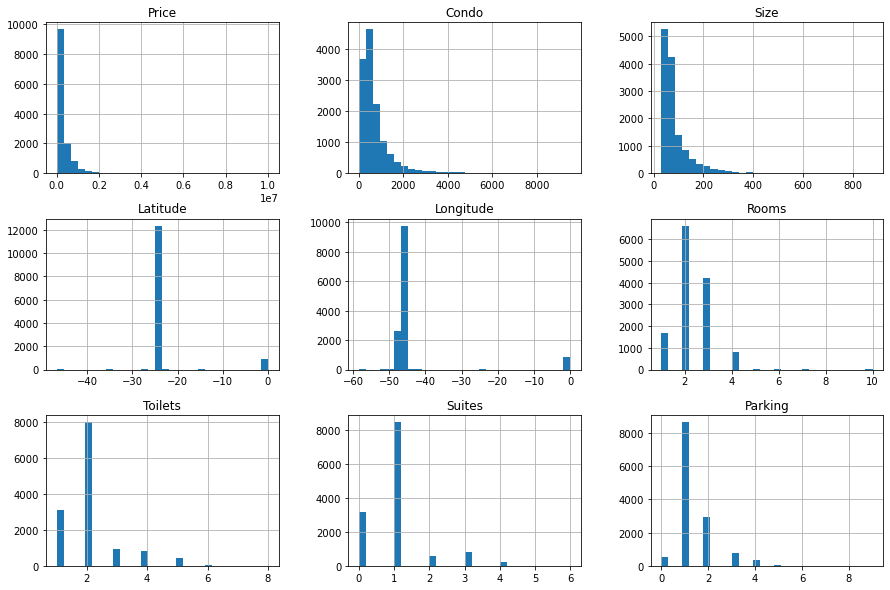

In [10]:
df[num_atri].hist(bins=30, figsize=(15,10))
display()

Text(0.5, 1.0, 'Size - Boxplot')

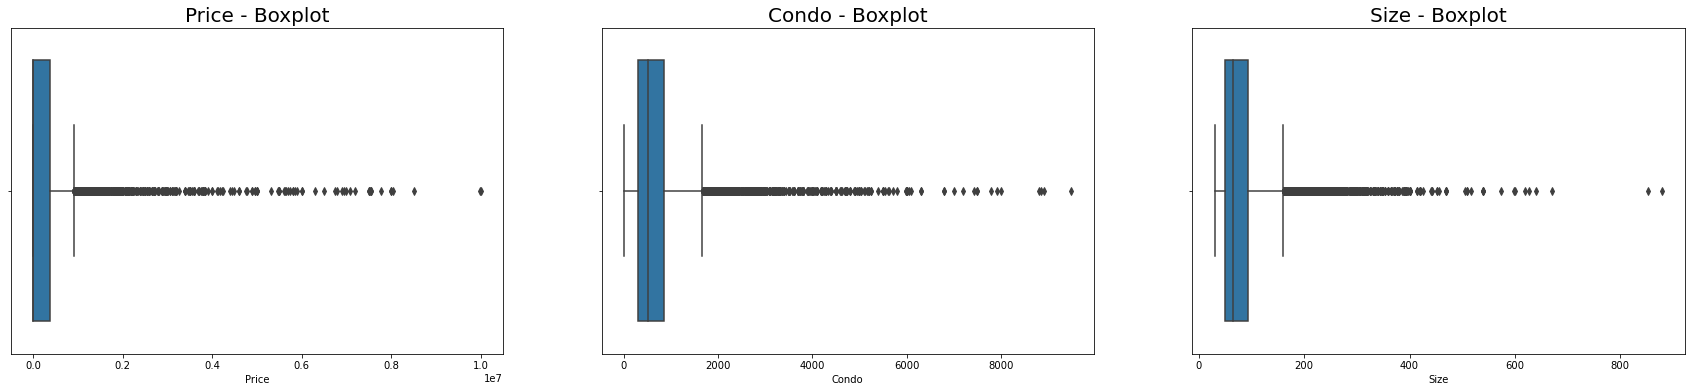

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

sns.boxplot(data = df, x='Price', ax = ax[0])
ax[0].set_title('Price - Boxplot', fontsize = 20)

sns.boxplot(data = df, x='Condo', ax = ax[1])
ax[1].set_title('Condo - Boxplot', fontsize = 20)

sns.boxplot(data = df, x='Size', ax = ax[2])
ax[2].set_title('Size - Boxplot', fontsize = 20)

As variáveis **Price**, **Condo** e **Size** possuem formato de uma curva assimétrica à esquerda. A análise dos boxplot dessas variáveis apontam vários outliers, porém nenhum deles é muito distante dos valores. Optamos por não excluir nenhum dos valores

A **Latitude** e **Longitude** possui uma distribuição muito concentrada e alguns valores zerados que podem ser interpretados como falta de informação das variáveis. 

**Rooms**, **Toilets**, **Suites** e **Parking** são variáveis que possuem uma moda bem evidente e támbem se assemelham a uma curva assimétrica à esquerda, porém com uma quantidade distinta de valores reduzidas. Os seus valores mínimos e máximos estão dentro do esperado e possíveis.

#### 2.2.1. Variáveis Categóricas

In [12]:
cat_atri = ['Elevator', 'Furnished', 'Swimming_Pool', 'New', 'District','Negotiation_Type', 'Property_Type']
df[cat_atri].head(3)

,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type
0,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
2,0,0,0,0,Artur Alvim/São Paulo,rent,apartment


In [13]:
for i in cat_atri:
    print(i)
    print(f'{df[i].value_counts()}\n')

Elevator
0    8574
1    4747
Name: Elevator, dtype: int64

Furnished
0    11346
1     1975
Name: Furnished, dtype: int64

Swimming_Pool
1    6869
0    6452
Name: Swimming_Pool, dtype: int64

New
0    13119
1      202
Name: New, dtype: int64

District
Moema/São Paulo              293
Mooca/São Paulo              287
Brooklin/São Paulo           248
Bela Vista/São Paulo         247
Pinheiros/São Paulo          244
                            ... 
Lajeado/São Paulo             43
Jardim São Luis/São Paulo     42
Grajaú/São Paulo              37
São Domingos/São Paulo        34
Perus/São Paulo               21
Name: District, Length: 96, dtype: int64

Negotiation_Type
rent    7019
sale    6302
Name: Negotiation_Type, dtype: int64

Property_Type
apartment    13321
Name: Property_Type, dtype: int64



In [14]:
print(f'Existem {len(df["District"].unique())} valores distintos de "District" no dataset')

Existem 96 valores distintos de "District" no dataset


<AxesSubplot:xlabel='Price', ylabel='Negotiation_Type'>

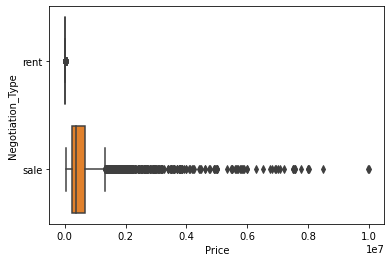

In [15]:
sns.boxplot(data = df, x='Price',y ='Negotiation_Type')

**Elevator**,**Furnished**,**Swimming Pool**,**New** são variáveis binárias, ou seja, os valores são 0 (negativo) ou 1 (positivo). 

A variável **Negotiation Type** também possui dois valores e será transformada em binária posteriormente. Um fato interessante sobre essa variável é que dependendo do tipo a variável alvo possui valores bem diferentes. O Range de preço para aluguel é bem inferior ao de venda.

Dentro de **District** existem 96 bairros diferentes, sendo Moema com maior número de ocorrências (293) e Perus o de menor valor (21)

A Coluna **Property Type** possui um valor único, visto que todos os imóveis da base são apartamentos

### 2.3. Negotiation Type = Rent

A partir de agora vamos dividir a análise exploratória em duas partes, a primeira será referente a apartamentos para alugar e a segunda para compra. Visto que a variável alvo é muito dependente do tipo de negociação do imóvel, vamos fazer análises separadas para encontrar as principais variáveis correlacionadas e como está a distribuição das demais

In [16]:
df_rent = df.query('Negotiation_Type == "rent"')
df_rent.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [17]:
df_rent[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,7019.00,7019.00,7019.00,7019.00,7019.00,7019.00,7019.00,7019.00,7019.00
mean,3099.16,831.93,90.00,-22.03,-43.49,2.31,2.11,1.03,1.46
std,3556.87,841.51,64.52,5.98,11.70,0.83,1.00,0.89,0.90
min,480.00,0.00,30.00,-46.75,-58.36,1.00,1.00,0.00,0.00
25%,1362.50,400.00,52.00,-23.60,-46.69,2.00,2.00,1.00,1.00
50%,2000.00,600.00,67.00,-23.56,-46.65,2.00,2.00,1.00,1.00
75%,3300.00,1000.00,100.00,-23.52,-46.59,3.00,2.00,1.00,2.00
max,50000.00,9500.00,880.00,0.00,0.00,10.00,8.00,5.00,9.00


<AxesSubplot:>

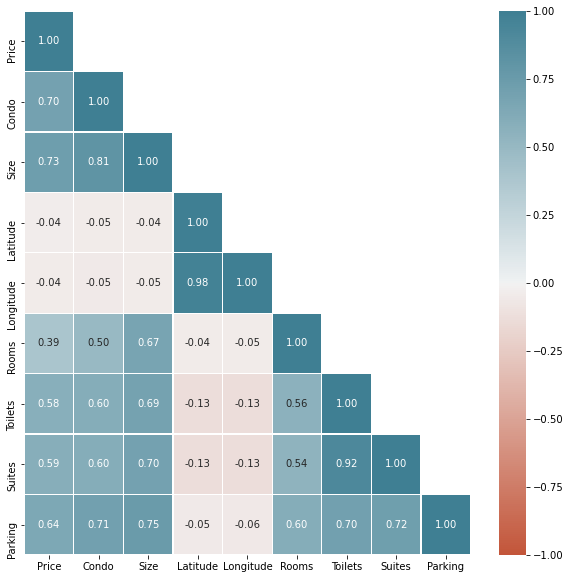

In [18]:
plt.figure(figsize=(10, 10))

mask = np.zeros_like(df_rent[num_atri].corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_rent[num_atri].corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f')

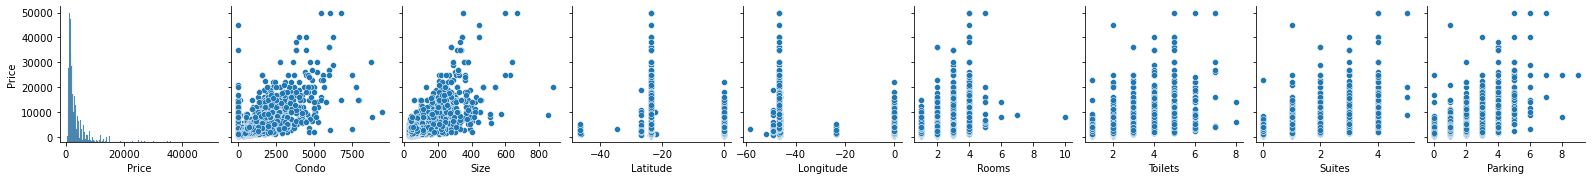

In [19]:
sns.pairplot(df_rent,y_vars=["Price"], x_vars = num_atri)

Os apartamentos para alugar possuem uma alta correlação com as características internas do imóvel (Tamanho, quartos, banheiros, suites, estacionamentos). O valor do condomínio também possui uma correlação positiva com o preço do imóvel.

In [20]:
df_rent.groupby('Elevator')['Price'].describe().T.round(2)

Elevator,0,1
count,4891.00,2128.00
mean,3028.85,3260.75
std,3561.98,3540.66
min,480.00,600.00
25%,1300.00,1498.50
50%,1900.00,2100.00
75%,3200.00,3500.00
max,50000.00,50000.00


In [21]:
df_rent.groupby('Furnished')['Price'].describe().T.round(2)

Furnished,0,1
count,5792.00,1227.00
mean,2820.21,4415.94
std,3248.56,4524.32
min,480.00,720.00
25%,1300.00,1950.50
50%,1800.00,3000.00
75%,3000.00,5000.00
max,50000.00,38000.00


In [22]:
df_rent.groupby('Swimming_Pool')['Price'].describe().T.round(2)

Swimming_Pool,0,1
count,3575.00,3444.00
mean,2374.52,3851.36
std,2815.32,4055.73
min,480.00,500.00
25%,1200.00,1700.00
50%,1500.00,2500.00
75%,2500.00,4200.00
max,45000.00,50000.00


In [32]:
df_rent.groupby('New')['Price'].describe().T.round(2)

New,0,1
count,7013.00,6.00
mean,3100.06,2041.67
std,3558.23,567.82
min,480.00,1250.00
25%,1360.00,1650.00
50%,2000.00,2150.00
75%,3300.00,2500.00
max,50000.00,2600.00


In [57]:
df_rent.groupby('District')['Price'].describe()[['count','mean']].sort_values(by='mean', ascending = False)

,count,mean
District,,
Itaim Bibi/São Paulo,140.0,8555.271429
Iguatemi/São Paulo,33.0,8532.606061
Alto de Pinheiros/São Paulo,127.0,7981.314961
Moema/São Paulo,163.0,7547.993865
Jardim Paulista/São Paulo,140.0,7437.842857
...,...,...
Guaianazes/São Paulo,6.0,970.833333
José Bonifácio/São Paulo,43.0,946.023256
Lajeado/São Paulo,8.0,931.250000


Em relação as variáveis categóricas, temos que apartamentos mobiliados e com piscina possuem um preço mais caro. O Elevador não possui grande relação com o valor do aluguel. Sobre a condição do apartamento, temos poucas amostras de *apartamentos novos para alugar*, de modo que não é possível fazer essa comparação.

É possível encontrar uma grande diferença no aluguel em relação aos bairros, lugares consideramos mais "nobres" como Itaim Bibi e Iguatemi possuem um aluguel médio mais alto em relação a Itaim Paulista e Grajaú

### 2.4. Negotiation Type = Sale


In [24]:
df_sale = df.query('Negotiation_Type == "sale"')
df_sale.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594


In [25]:
df_sale[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,6302.00,6302.00,6302.00,6302.00,6302.00,6302.00,6302.00,6302.00,6302.00
mean,613175.62,542.37,79.00,-22.12,-43.68,2.32,2.04,0.94,1.33
std,744889.26,627.05,51.08,5.78,11.31,0.71,0.92,0.77,0.76
min,42000.00,0.00,30.00,-46.73,-49.34,1.00,1.00,0.00,0.00
25%,250000.00,161.25,50.00,-23.59,-46.67,2.00,2.00,1.00,1.00
50%,380828.50,400.00,62.00,-23.55,-46.63,2.00,2.00,1.00,1.00
75%,680000.00,700.00,88.00,-23.51,-46.53,3.00,2.00,1.00,2.00
max,10000000.00,8920.00,620.00,0.00,0.00,6.00,7.00,6.00,7.00


<AxesSubplot:>

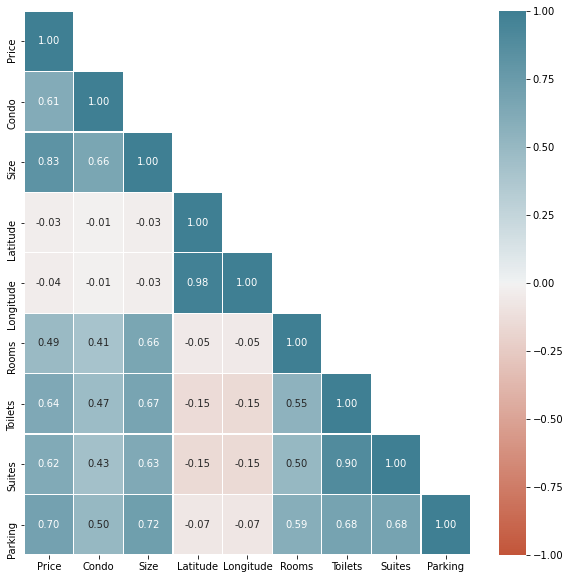

In [26]:
plt.figure(figsize=(10, 10))

mask = np.zeros_like(df_sale[num_atri].corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_sale[num_atri].corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f')

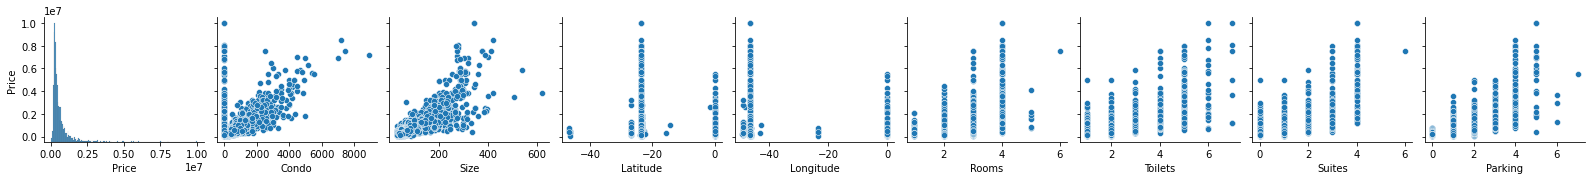

In [27]:
sns.pairplot(df_sale,y_vars=["Price"], x_vars = num_atri)

Os apartamentos para alugar possuem uma alta correlação com as características internas do imóvel (Tamanho, quartos, banheiros, suites, estacionamentos). O valor do condomínio também possui uma correlação positiva com o preço do imóvel.

In [28]:
df_sale.groupby('Elevator')['Price'].describe().T.round(2)

Elevator,0,1
count,3683.00,2619.00
mean,571794.31,671368.57
std,696751.90,804286.06
min,42000.00,68000.00
25%,239000.00,280000.00
50%,360000.00,425000.00
75%,646000.00,729157.50
max,10000000.00,9979947.00


In [29]:
df_sale.groupby('Furnished')['Price'].describe().T.round(2)

Furnished,0,1
count,5554.00,748.00
mean,596703.68,735481.96
std,743088.69,747344.07
min,47481.00,42000.00
25%,244925.00,328000.00
50%,370000.00,510000.00
75%,651500.00,850000.00
max,10000000.00,8039200.00


In [30]:
df_sale.groupby('Swimming_Pool')['Price'].describe().T.round(2)

Swimming_Pool,0,1
count,2877.00,3425.00
mean,469435.11,733917.65
std,534335.34,865630.65
min,42000.00,68000.00
25%,210000.00,320000.00
50%,290000.00,470000.00
75%,510000.00,779000.00
max,10000000.00,9979947.00


In [58]:
df_sale.groupby('New')['Price'].describe().T.round(2)

New,0,1
count,6106.00,196.00
mean,618467.87,448305.76
std,752342.24,424440.55
min,42000.00,85000.00
25%,250000.00,199000.00
50%,385000.00,292500.00
75%,681575.00,552500.00
max,10000000.00,3050003.00


In [59]:
df_sale.groupby('District')['Price'].describe()[['count','mean']].sort_values(by='mean', ascending = False)

,count,mean
District,,
Iguatemi/São Paulo,20.0,3.665528e+06
Alto de Pinheiros/São Paulo,97.0,2.455076e+06
Itaim Bibi/São Paulo,76.0,1.858341e+06
Jardim Paulista/São Paulo,77.0,1.802961e+06
Vila Olimpia/São Paulo,39.0,1.642423e+06
...,...,...
Guaianazes/São Paulo,69.0,1.919128e+05
Perus/São Paulo,21.0,1.898090e+05
Artur Alvim/São Paulo,83.0,1.896855e+05


Em relação as variáveis categóricas, temos que apartamentos mobiliados, com piscina e elevador possuem um preço mais caro.  Sobre a condição do apartamento, temos poucas amostras de *apartamentos novos para comprar*, de modo que não é possível fazer essa comparação.

É possível encontrar uma grande diferença no preçod de venda dos apartamentos em relação aos bairros, lugares consideramos mais "nobres" como Iguatemi e Alto de Prinheiros possuem um valor médio de venda mais alto em relação a Cidade Tiradentes e Lajeado

### 2.5. Conclusão

O preço do imóvel possui uma alta correlação com as características do imóvel e conforme o aumento da quantidade de cômodos e atributos (estacionamento, piscina, mobilia) o preço tende a aumentar. A base de dados possui um atributo fundamental para definir o preço final, se o imóvel está para vender ou alugar. Um atributo bem importante é o bairro onde o imóvel está localizado, possuindo um preço médio diferente dependendo do local. 
Algumas colunas possuem uma relação menos com os dados. A latitude e longitude são numericamente pouco significante, podendo utilzar a informação do bairro em relação a localização. A coluna Property_Type não oferece nenhuma informação adiconal pois possui um valor único. Por fim, pouco se consegue extrair da informação sobre o imóvel ser novo ou não pois a quantidade de imóveis novos são bem inferiores quando comparadas com usados.

## 3. Preparação das Bases

* Feature scaling
* Discussão sucinta sobre a razão de cada etapa de limpeza e pre-processamento considerada;

## 4. Treinamento e validação de modelos de regressão

### 4.1. Modelo 1: xxxx

### 4.2. Modelo 2: xxxx

### 4.3. Modelo 3: xxxx

### 4.4. Discussão dos resultatos
* Métricas utilizadas
* Há overfitting ou underfitting?

### 4.5. Próximos passos
* Estratégias, ideias, sugestões para melhorar o modelo

## Atividades opcionais

### a) Usar pipelines (scikit-Learn)

### b) Fine-tuning

### c) Ensemble methods

### d) Abordagem de negócio
* Motivação e descrição do problema 
* Baseline
* Comparação dos resultados com o baseline
* Conversão dos resultados em medidas de performace para o negócio